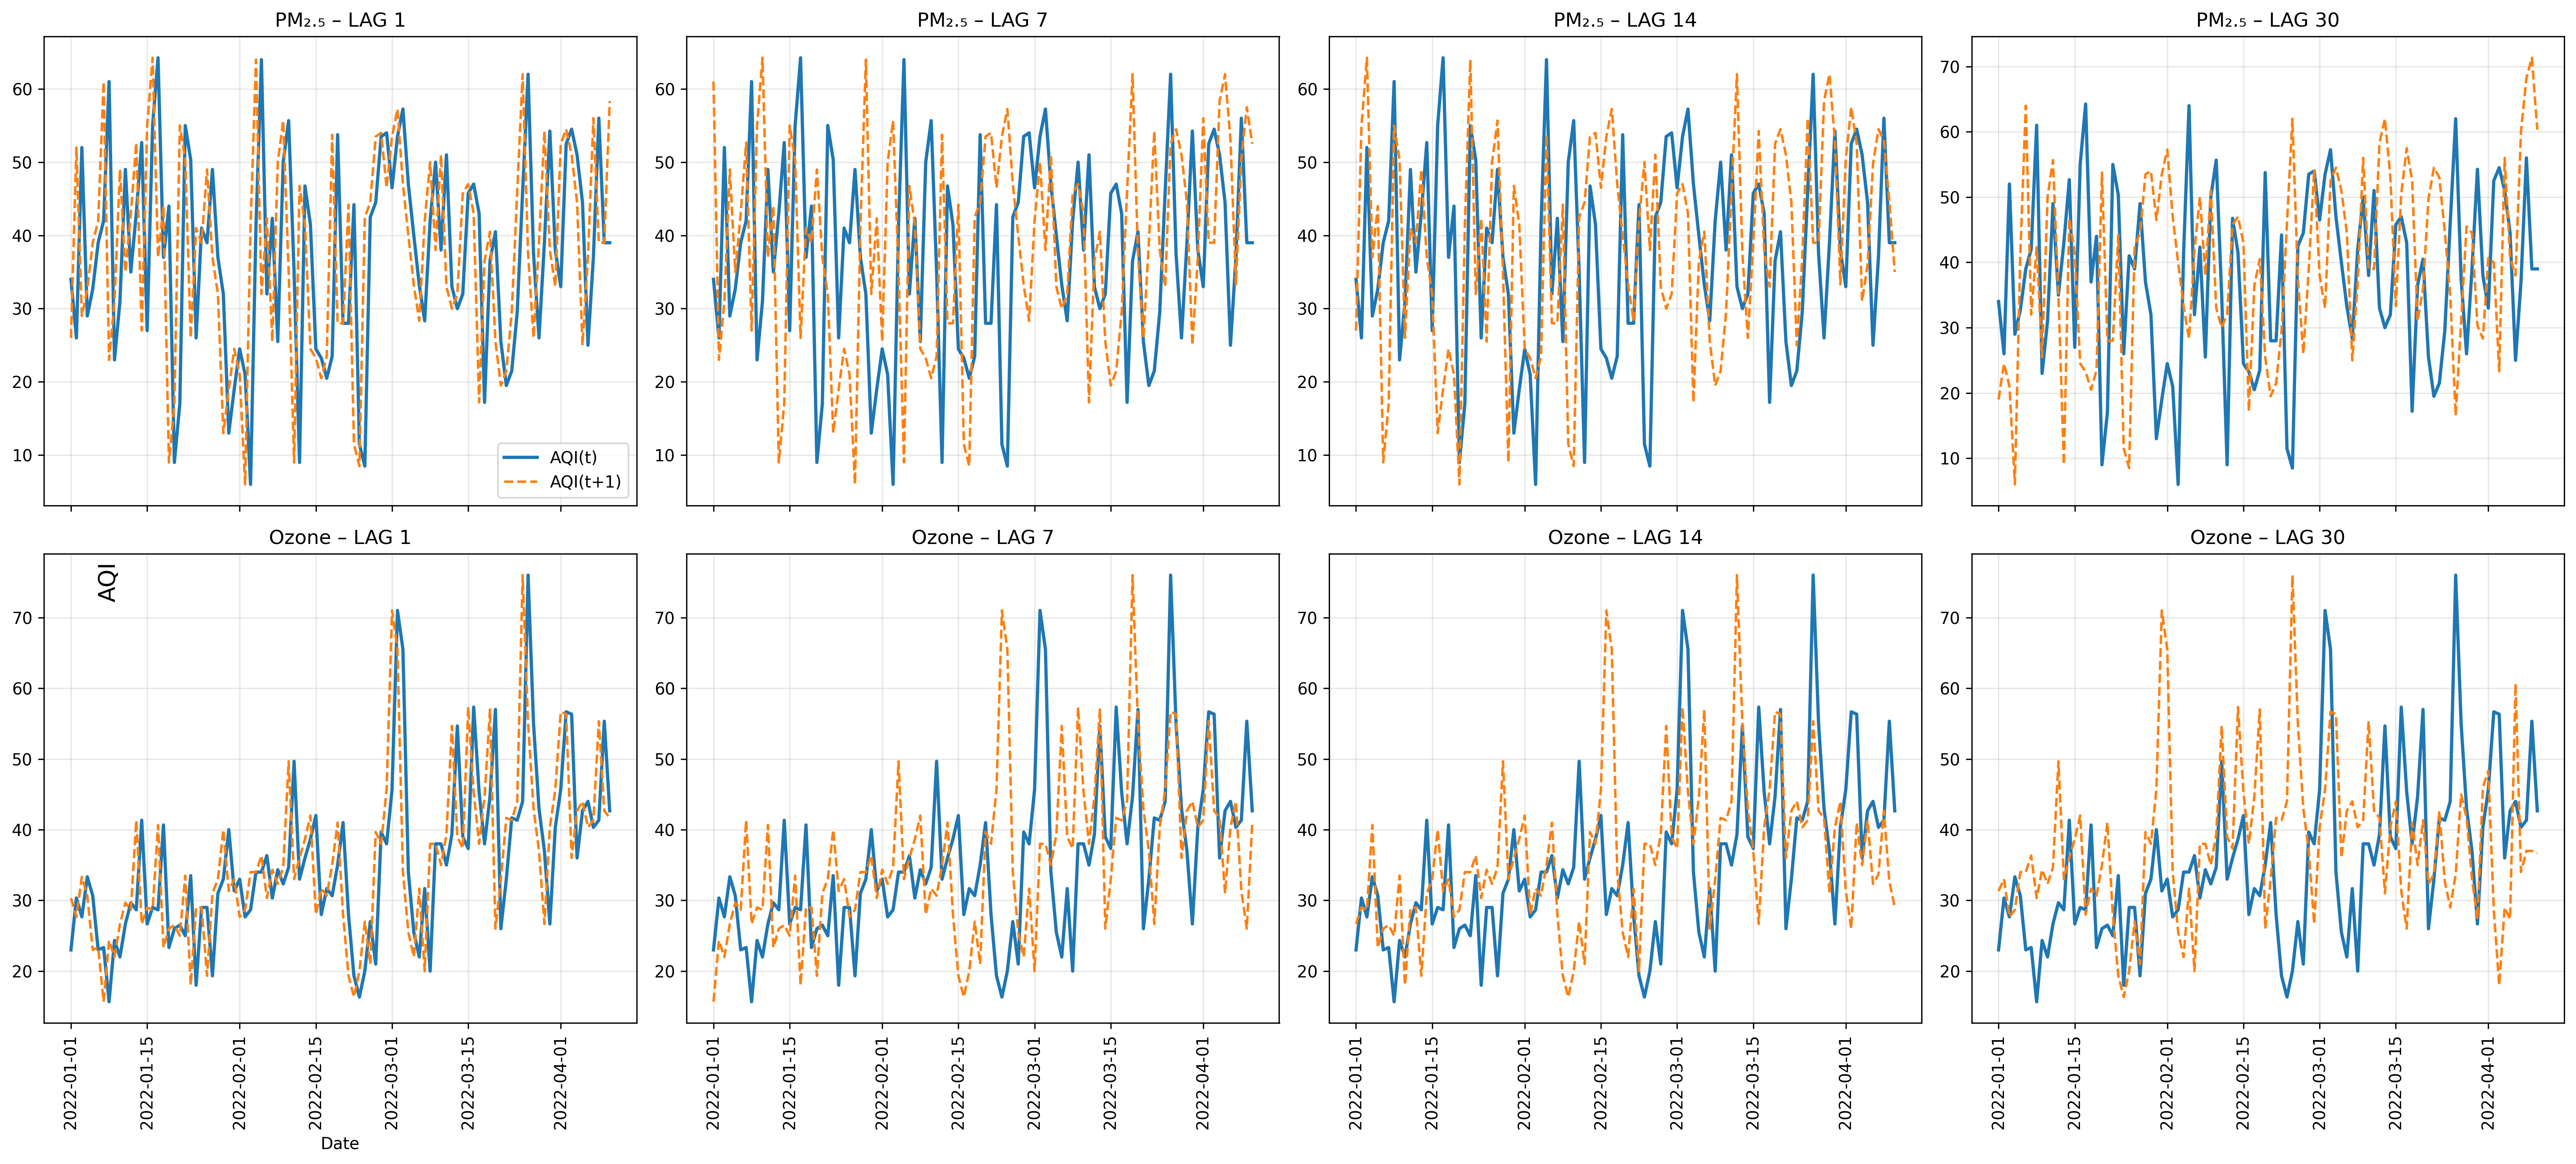

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

N = 100

pm_lag1 = pd.read_csv("datasets/final/datasets_lagwise/LAG1_PM_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
pm_lag7 = pd.read_csv("datasets/final/datasets_lagwise/LAG7_PM_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
pm_lag14 = pd.read_csv("datasets/final/datasets_lagwise/LAG14_PM_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
pm_lag30 = pd.read_csv("datasets/final/datasets_lagwise/LAG30_PM_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])

pm = (
    pm_lag1
    .merge(pm_lag7[["DATE", "AQI_Targeted_Value_LAG_7"]], on="DATE", how="left")
    .merge(pm_lag14[["DATE", "AQI_Targeted_Value_LAG_14"]], on="DATE", how="left")
    .merge(pm_lag30[["DATE", "AQI_Targeted_Value_LAG_30"]], on="DATE", how="left")
)

pm = pm.rename(
    columns={
        "AQI_Targeted_Value_LAG_1": "LAG 1",
        "AQI_Targeted_Value_LAG_7": "LAG 7",
        "AQI_Targeted_Value_LAG_14": "LAG 14",
        "AQI_Targeted_Value_LAG_30": "LAG 30",
    }
).iloc[:N, :]

oz_lag1 = pd.read_csv("datasets/final/datasets_lagwise/LAG1_Ozone_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
oz_lag7 = pd.read_csv("datasets/final/datasets_lagwise/LAG7_Ozone_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
oz_lag14 = pd.read_csv("datasets/final/datasets_lagwise/LAG14_Ozone_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])
oz_lag30 = pd.read_csv("datasets/final/datasets_lagwise/LAG30_Ozone_Combined_AQI_2022_2024.csv", parse_dates=["DATE"])

oz = (
    oz_lag1
    .merge(oz_lag7[["DATE", "AQI_Targeted_Value_LAG_7"]], on="DATE", how="left")
    .merge(oz_lag14[["DATE", "AQI_Targeted_Value_LAG_14"]], on="DATE", how="left")
    .merge(oz_lag30[["DATE", "AQI_Targeted_Value_LAG_30"]], on="DATE", how="left")
)

oz = oz.rename(
    columns={
        "AQI_Targeted_Value_LAG_1": "LAG 1",
        "AQI_Targeted_Value_LAG_7": "LAG 7",
        "AQI_Targeted_Value_LAG_14": "LAG 14",
        "AQI_Targeted_Value_LAG_30": "LAG 30",
    }
).iloc[:N, :]

fig, axes = plt.subplots(2, 4, figsize=(22, 10), dpi=300, sharex=True)

horizons = ["LAG 1", "LAG 7", "LAG 14", "LAG 30"]

for i, lag in enumerate(horizons):
    axes[0, i].plot(pm["DATE"], pm["Daily_AQI_Value"], label="AQI(t)", linewidth=2)
    axes[0, i].plot(pm["DATE"], pm[lag], label=f"AQI(t+{lag.split()[1]})", linestyle="--")
    axes[0, i].set_title(f"PM₂.₅ – {lag}")
    axes[0, i].grid(True, alpha=0.3)

for i, lag in enumerate(horizons):
    axes[1, i].plot(oz["DATE"], oz["Daily_AQI_Value"], label="AQI(t)", linewidth=2)
    axes[1, i].plot(oz["DATE"], oz[lag], label=f"AQI(t+{lag.split()[1]})", linestyle="--")
    axes[1, i].set_title(f"Ozone – {lag}")
    axes[1, i].grid(True, alpha=0.3)

axes[1, 0].set_xlabel("Date")
fig.text(0.04, 0.5, "AQI", va="center", rotation="vertical", fontsize=14)

axes[0, 0].legend()

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig("multi_horizon_PM_Ozone.png", dpi=300, bbox_inches="tight")
plt.show()


In [2]:
import pandas as pd
# ---------- 1) Load & prepare raw data ----------
CSV_PATH = "datasets/final/datasets_lagwise/PM_Combined_AQI_2022_2024.csv"

df = pd.read_csv(CSV_PATH)
df["DATE"] = pd.to_datetime(df["Date"], format="%d-%m-%y", dayfirst=True, errors="coerce")  # make parsing explicit
df = df.dropna(subset=["DATE", "Daily_Mean_PM", "Daily_AQI_Value"]).reset_index(drop=True)
# (no sort_values here)
pm_base = df[["DATE", "Daily_Mean_PM", "Daily_AQI_Value"]].copy()

print("Base PM Dataset Summary")
print("Rows:", len(pm_base))
print("Date range:", pm_base["DATE"].min(), "to", pm_base["DATE"].max())
print("AQI min:", pm_base["Daily_AQI_Value"].min())
print("AQI max:", pm_base["Daily_AQI_Value"].max())
print("AQI mean:", pm_base["Daily_AQI_Value"].mean())
print("AQI std:", pm_base["Daily_AQI_Value"].std())
print("PM min:", pm_base["Daily_Mean_PM"].min())
print("PM max:", pm_base["Daily_Mean_PM"].max())
print("PM mean:", pm_base["Daily_Mean_PM"].mean())
print("PM std:", pm_base["Daily_Mean_PM"].std())


Base PM Dataset Summary
Rows: 1094
Date range: 2022-01-01 00:00:00 to 2024-12-31 00:00:00
AQI min: 6.0
AQI max: 124.0
AQI mean: 46.17809262644728
AQI std: 14.89556987458818
PM min: 0.4499999999999999
PM max: 44.85
PM mean: 9.62383150517977
PM std: 4.899931778662444


In [3]:
import pandas as pd
# ---------- 1) Load & prepare raw data ----------
CSV_PATH = "datasets/final/datasets_lagwise/Ozone_Combined_AQI_2022_2024.csv"

df = pd.read_csv(CSV_PATH)
df["DATE"] = pd.to_datetime(df["Date"], format="%d-%m-%y", dayfirst=True, errors="coerce")  # make parsing explicit
df = df.dropna(subset=["DATE", "Daily_Mean_Ozone", "Daily_AQI_Value"]).reset_index(drop=True)
# (no sort_values here)
pm_base = df[["DATE", "Daily_Mean_Ozone", "Daily_AQI_Value"]].copy()

print("Base Ozone Dataset Summary")
print("Rows:", len(pm_base))
print("Date range:", pm_base["DATE"].min(), "to", pm_base["DATE"].max())
print("AQI min:", pm_base["Daily_AQI_Value"].min())
print("AQI max:", pm_base["Daily_AQI_Value"].max())
print("AQI mean:", pm_base["Daily_AQI_Value"].mean())
print("AQI std:", pm_base["Daily_AQI_Value"].std())
print("Ozone min:", pm_base["Daily_Mean_Ozone"].min())
print("Ozone max:", pm_base["Daily_Mean_Ozone"].max())
print("Ozone mean:", pm_base["Daily_Mean_Ozone"].mean())
print("Ozone std:", pm_base["Daily_Mean_Ozone"].std())


Base Ozone Dataset Summary
Rows: 1091
Date range: 2022-01-01 00:00:00 to 2024-12-30 00:00:00
AQI min: 2.6666666666666665
AQI max: 168.33333333333334
AQI mean: 41.816070882981975
AQI std: 20.7774168846132
Ozone min: 0.002666667
Ozone max: 0.092666667
Ozone mean: 0.041463183624197986
Ozone std: 0.013831452061209852
